In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
# plt.rcParams['figure.figsize'] = (25, 6)
%matplotlib inline

In [3]:
data = pd.read_csv('data/full_data')

In [5]:
data_att = data[data['favTeamOnBall']==1]

In [6]:
data_def = data[data['favTeamOnBall']==-1]

In [7]:
att = pd.read_csv('final_model_data/Attack.csv')
defense = pd.read_csv('final_model_data/Defense.csv')

In [10]:
data.head(0)

,GameID,Drive,qtr,down,TimeSecs,yrdline100,posteam,DefensiveTeam,sp,ScoreDiff,...,Underdog,Spread,CoverOrNot,FavScoreDiff,favTeamOnBall,DownClass,TimeSecsClass,yrdline100Class,FavScoreDiffClass,Prob


In [11]:
data_att = pd.merge(data_att, att, on=['DownClass','FavScoreDiffClass','yrdline100Class','TimeSecsClass'], how='left')

In [12]:
data_def = pd.merge(data_def, defense, on=['DownClass','FavScoreDiffClass','yrdline100Class','TimeSecsClass'], how='left')

In [14]:
data_def.head()

,GameID,Drive,qtr,down,TimeSecs,yrdline100,posteam,DefensiveTeam,sp,ScoreDiff,...,Spread,CoverOrNot,FavScoreDiff,favTeamOnBall,DownClass,TimeSecsClass,yrdline100Class,FavScoreDiffClass,Prob,Pmodel
0,2013090500,1,1,1.0,3600.0,80.0,BAL,DEN,0,0.0,...,-7.5,1.0,-0.0,-1,1,59,8,7,0.464577,0.491664
1,2013090500,1,1,2.0,3554.0,81.0,BAL,DEN,0,0.0,...,-7.5,1.0,-0.0,-1,2,59,9,7,0.467181,0.498609
2,2013090500,1,1,3.0,3518.0,78.0,BAL,DEN,0,0.0,...,-7.5,1.0,-0.0,-1,3,58,8,7,0.509346,0.494024
3,2013090500,1,1,4.0,3498.0,72.0,BAL,DEN,0,0.0,...,-7.5,1.0,-0.0,-1,4,58,8,7,0.464730,0.492616
4,2013090500,3,1,1.0,3369.0,80.0,BAL,DEN,0,0.0,...,-7.5,1.0,-0.0,-1,1,56,8,7,0.402010,0.476251


In [31]:
prob_data = data_def

In [32]:
nbins = 100

In [33]:
numr = prob_data.groupby('Pmodel').apply(lambda x: x[x['CoverOrNot']==1]['GameID'].unique().shape[0])

In [34]:
numr = numr.reset_index()

In [35]:
numr.columns=['prob','count']

In [36]:
numr.describe()

,prob,count
count,20087.000000,20087.000000
mean,0.510963,3.552298
std,0.196022,6.248070
min,0.157307,0.000000
25%,0.326821,0.000000
50%,0.498038,2.000000
75%,0.702753,5.000000
max,0.920958,373.000000


In [37]:
denr = prob_data.groupby('Pmodel').apply(lambda x: x['GameID'].unique().shape[0])

In [38]:
denr = denr.reset_index()

In [39]:
denr.columns=['prob','count']

In [40]:
denr.describe()

,prob,count
count,20087.000000,20087.000000
mean,0.510963,7.718873
std,0.196022,12.358931
min,0.157307,1.000000
25%,0.326821,2.000000
50%,0.498038,4.000000
75%,0.702753,10.000000
max,0.920958,806.000000


In [41]:
numr_bins, bins_n = np.histogram(numr['prob'],weights=numr['count'],bins = nbins)

In [42]:
denr_bins, bins_d = np.histogram(denr['prob'],weights=denr['count'], bins=nbins)

In [43]:
final_motherfucking_values = [float(numr_bins[i])/float(denr_bins[i]+1) for i in range(100)]

In [44]:
final_motherfucking_values

[0.0,
 0.0,
 0.007352941176470588,
 0.0025575447570332483,
 0.015594541910331383,
 0.012640449438202247,
 0.023676880222841225,
 0.031813361611876985,
 0.027777777777777776,
 0.03019213174748399,
 0.030844155844155844,
 0.04819277108433735,
 0.056768558951965066,
 0.064797507788162,
 0.07324276432368576,
 0.08700906344410876,
 0.10087241003271538,
 0.10603588907014681,
 0.11807498601007274,
 0.12752912323727775,
 0.15122534369396293,
 0.14304291287386217,
 0.17329910141206675,
 0.1681178834561286,
 0.20692090395480225,
 0.20150943396226415,
 0.2339986235375086,
 0.23961840628507294,
 0.24062816616008106,
 0.2734584450402145,
 0.2808080808080808,
 0.2786703601108033,
 0.3002288329519451,
 0.2867504835589942,
 0.3103448275862069,
 0.32217573221757323,
 0.32679465776293826,
 0.36027813993915686,
 0.3618368962787015,
 0.36241900647948166,
 0.39420203227734607,
 0.3865353037766831,
 0.4244201546254332,
 0.4174174174174174,
 0.42419894787183166,
 0.42621969470218496,
 0.42755604155276106,
 0

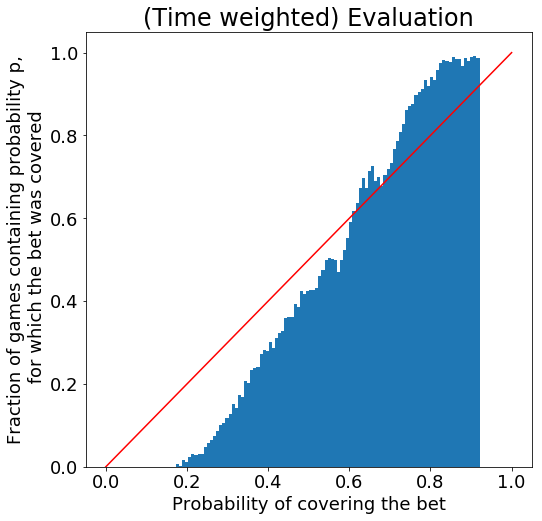

In [45]:
fig,ax = plt.subplots(figsize=(8,8))
ax.bar(bins_d[:-1],final_motherfucking_values, width=np.diff(bins_d),align='edge')
x = np.linspace(0,1)
ax.plot(x,x,color='red')

ax.set_title('(Time weighted) Evaluation', fontsize=24)
ax.set_xlabel('Probability of covering the bet', fontsize=18)
ax.set_ylabel("Fraction of games containing probability p,\n for which the bet was covered", fontsize=18)
ax.tick_params(labelsize=18)

plt.show()